# Original code - Iris dataset  

In [43]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
scipy: 1.4.1
numpy: 1.18.5
matplotlib: 3.2.2
pandas: 1.0.5
sklearn: 0.22.2.post1


In [78]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.ridge module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [ ]:
# shape
print(dataset.shape)

(150, 5)


In [ ]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [ ]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


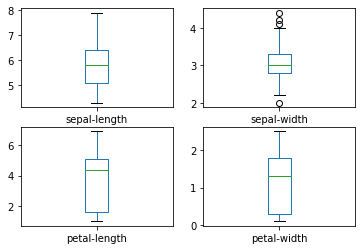

In [ ]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

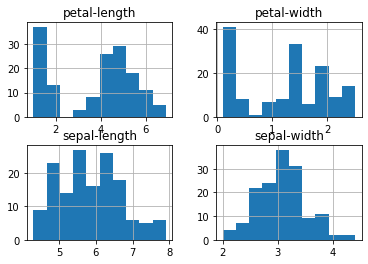

In [ ]:
# histograms
dataset.hist()
pyplot.show()

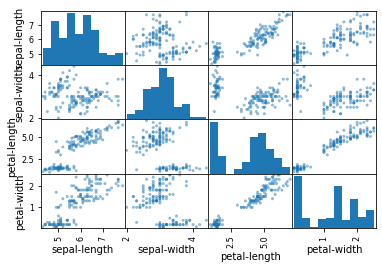

In [ ]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


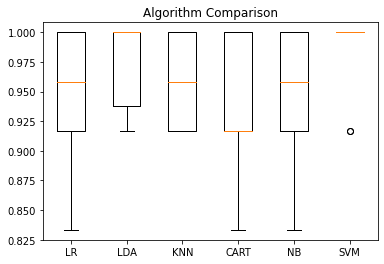

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Pima Indians Diabetes Dataset

In [59]:
# Download dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = ['Number_of_times_pregnant','Plasma_glucose_concentration','Diastolic_blood_pressure',
         'Triceps_skinfold_thickness','Two_Hour_serum_insulin',
         'Body_mass_index','Diabetes_pedigree_function','Age','class']
dataset = read_csv(url, names=names) 

In [61]:
# shape
print(dataset.shape)
# head
print(dataset.head(20))
# class distribution
print(dataset.groupby('class').size())

(768, 9)
    Number_of_times_pregnant  Plasma_glucose_concentration  ...  Age  class
0                          6                           148  ...   50      1
1                          1                            85  ...   31      0
2                          8                           183  ...   32      1
3                          1                            89  ...   21      0
4                          0                           137  ...   33      1
5                          5                           116  ...   30      0
6                          3                            78  ...   26      1
7                         10                           115  ...   29      0
8                          2                           197  ...   53      1
9                          8                           125  ...   54      1
10                         4                           110  ...   30      0
11                        10                           168  ...   34      1
12 

In [60]:
# descriptions
print(dataset.Number_of_times_pregnant.describe())
print(dataset.Plasma_glucose_concentration.describe())
print(dataset.Diastolic_blood_pressure.describe())
print(dataset.Triceps_skinfold_thickness.describe())
print(dataset.Two_Hour_serum_insulin.describe())
print(dataset.Body_mass_index.describe())
print(dataset.Diabetes_pedigree_function.describe())
print(dataset.Age.describe())

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Number_of_times_pregnant, dtype: float64
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Plasma_glucose_concentration, dtype: float64
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: Diastolic_blood_pressure, dtype: float64
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: Triceps_skinfold_thickness, dtype: float64
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: 

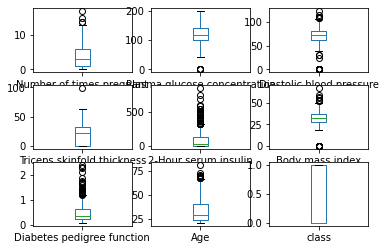

In [29]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

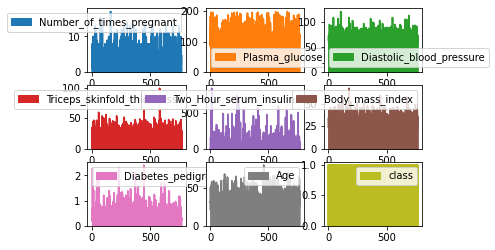

In [73]:
dataset.plot(kind='area', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

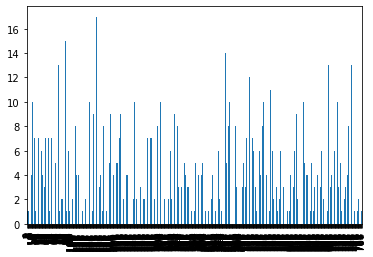

In [63]:
dataset.Number_of_times_pregnant.plot(kind='bar', sharex=False, sharey=False)
pyplot.show()

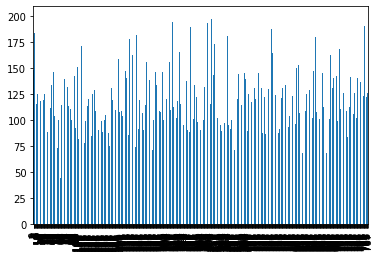

In [65]:
dataset.Plasma_glucose_concentration.plot(kind='bar', sharex=False, sharey=False)
pyplot.show()

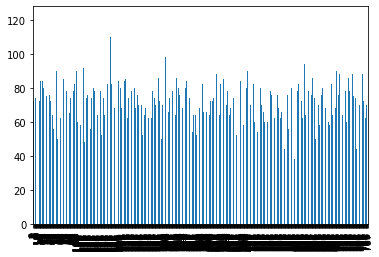

In [66]:
dataset.Diastolic_blood_pressure.plot(kind='bar', sharex=False, sharey=False)
pyplot.show()

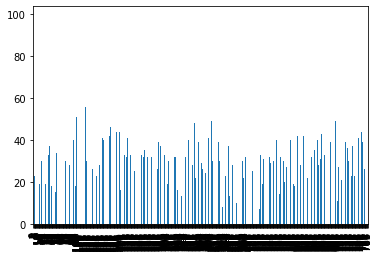

In [67]:
dataset.Triceps_skinfold_thickness.plot(kind='bar', sharex=False, sharey=False)
pyplot.show()

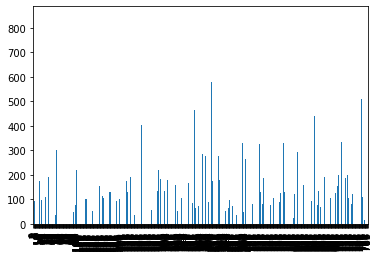

In [68]:
dataset.Two_Hour_serum_insulin.plot(kind='bar', sharex=False, sharey=False)
pyplot.show()

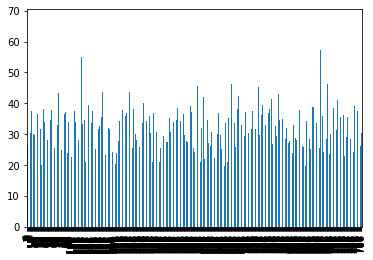

In [69]:
dataset.Body_mass_index.plot(kind='bar', sharex=False, sharey=False)
pyplot.show()

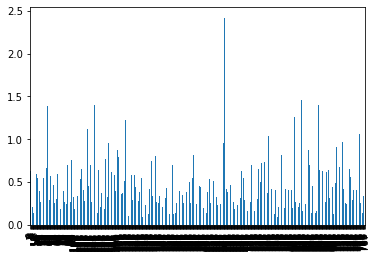

In [70]:
dataset.Diabetes_pedigree_function.plot(kind='bar', sharex=False, sharey=False)
pyplot.show()

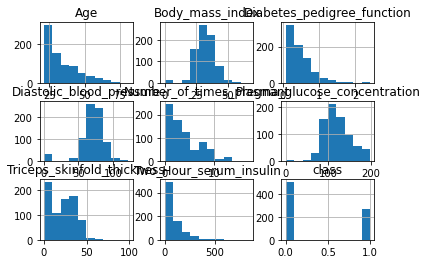

In [71]:
dataset.hist()
pyplot.show()

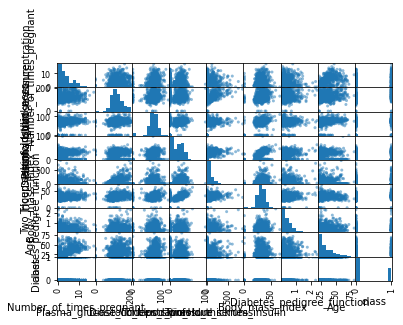

In [72]:
scatter_matrix(dataset)
pyplot.show()

In [74]:
array = dataset.values
X = array[:,0:8]
y = array[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [79]:

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('extraTree',ExtraTreeClassifier(random_state=0)))
models.append(('MLP',MLPClassifier(random_state=1, max_iter=300)))
models.append(('RIDGE',RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.760682 (0.046971)
LDA: 0.765627 (0.060664)
KNN: 0.714754 (0.057797)
CART: 0.663035 (0.039171)
NB: 0.763882 (0.036419)
SVM: 0.653120 (0.005458)
extraTree: 0.661370 (0.061603)
MLP: 0.689053 (0.061086)
RIDGE: 0.770518 (0.057124)


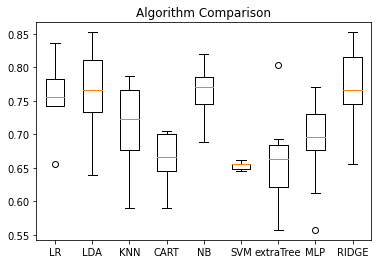

In [80]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [81]:
# Make predictions on validation dataset
model = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [82]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7792207792207793
[[89 10]
 [24 31]]
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84        99
         1.0       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

